In [31]:
import time, os
from pprint import pprint

import pandas as pd
from selenium.webdriver import Edge, EdgeOptions
from selenium.webdriver.edge.service import Service


In [32]:
options = EdgeOptions()
service = Service('msedgedriver.exe')

In [33]:
browser = Edge(options=options, service=service)
browser.get('https://ge.globo.com/futebol/brasileirao-serie-a/')

xpath = '/html/body/div[2]/main/div[2]/div/section[1]/article/section[1]/div'

time.sleep(3)
element = browser.find_element('xpath', xpath)
test = element.get_attribute('outerHTML')
df1 = pd.read_html(str(test))[0]
df2  = pd.read_html(str(test))[1]

df = df1.join(df2)
browser.quit()

os.system('cls')
df.head()

,Classificação,Classificação.1,Classificação.2,P,J,V,E,D,GP,GC,SG,%,ÚLT. JOGOS
0,1,BotafogoBOT,1,9,3,3,0,0,7,4,3,100,NaN
1,2,FortalezaFOR,1,7,3,2,1,0,8,3,5,77,NaN
2,3,PalmeirasPAL,1,7,3,2,1,0,6,4,2,77,NaN
3,4,InternacionalINT,2,7,3,2,1,0,4,2,2,77,NaN
4,5,FluminenseFLU,4,6,3,2,0,1,7,4,3,66,NaN


In [34]:
df.rename(columns={'Classificação.1': 'Time'}, inplace=True)
df.drop(columns=['Classificação.2', 'ÚLT. JOGOS'], inplace=True)
df.set_index('Classificação')

,Time,P,J,V,E,D,GP,GC,SG,%
Classificação,,,,,,,,,,
1,BotafogoBOT,9,3,3,0,0,7,4,3,100
2,FortalezaFOR,7,3,2,1,0,8,3,5,77
3,PalmeirasPAL,7,3,2,1,0,6,4,2,77
4,InternacionalINT,7,3,2,1,0,4,2,2,77
5,FluminenseFLU,6,3,2,0,1,7,4,3,66
6,CruzeiroCRU,6,3,2,0,1,5,2,3,66
7,GrêmioGRE,6,3,2,0,1,3,2,1,66
8,São PauloSAO,4,3,1,1,1,5,3,2,44
9,VascoVAS,4,3,1,1,1,4,4,0,44


In [95]:
names = [i[-3:] for i in df['Time']]
names

['BOT',
 'FOR',
 'PAL',
 'INT',
 'FLU',
 'CRU',
 'GRE',
 'SAO',
 'VAS',
 'CAM',
 'SAN',
 'RBB',
 'FLA',
 'CAP',
 'BAH',
 'GOI',
 'COR',
 'CUI',
 'CFC',
 'AME']

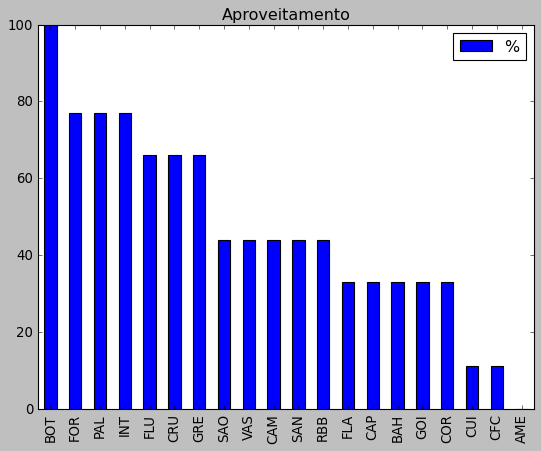

In [99]:
import matplotlib.pyplot as plot

df['sig'] = names
# ['line', 'bar', 'barh', 'hist', 'box', 'kde', 'density', 'area', 'pie', 'scatter', 'hexbin']
ax = df.plot(y='%', x='sig', kind='bar')
plot.title('Aproveitamento')
ax.set_xlabel('')
plot.show()

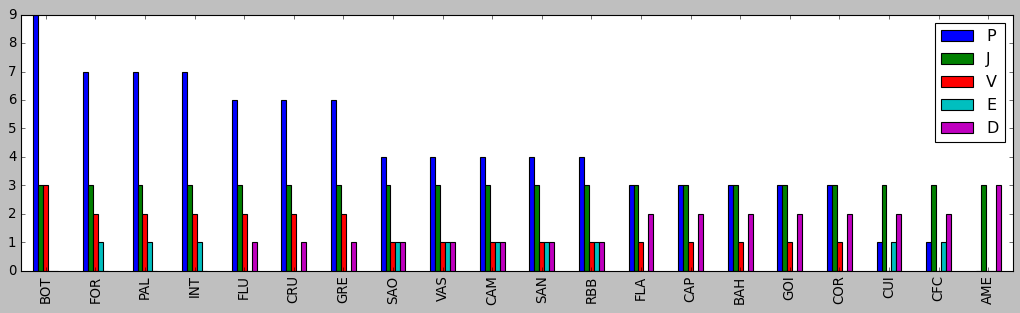

In [101]:
# P J V E D GP GC SG
ax = df.plot(x='sig', y=['P', 'J', 'V', 'E', 'D'], kind='bar')
ax.set_xlabel('')
size = plot.gcf()
size.set_size_inches(16, 4)
plot.show()